# simpliest example 1: single neuron with naive training
Lets start with single neuron and dummiest task: educate one neuron to calculate "how many apples can we byu with given money?"  
we know the exact price for one apple, but we won't use it in machine, we will use it just to make a dataset for training and dataset for testing  
So, in this example our neural network will:
* consist only one neuron
* have single input - amount of money
* have single output - amount of apples we can buy
Usage of the trained network should be as fallows:
amountOfApples = neuron.do(amountOfMoney)

this is a very stupid example, i bet noone does it in that way. However it is damneasy, so anyone can understand it

We know that with 12412 money and the price 69 we can buy 179.8840579710145 apples.
Our not educated neuron says that with 12412 money we can buy 12412 apples.
Our network have now error (we know the true weight): 68
1
1.0
We know that with 12412 money and the price 69 we can buy 179.8840579710145 apples.
Our educated neuron says that with 12412 money we can buy 12412.0 apples.
Our educated neuron says price is 1.0, however the real price is 69.


<ipython-input-190-eaec4fd64bb9>:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-error))


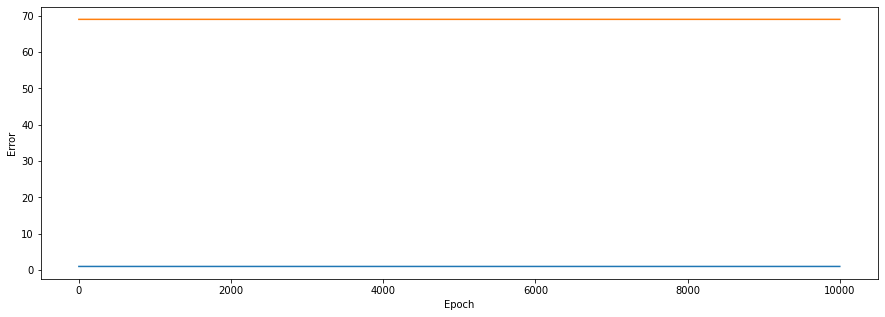

In [190]:
import random, matplotlib

class neuron:
    def __init__(self, weight=1) -> None:
        self.weight = weight

    def __str__(self) -> str:
        return(str(self.weight))

    def do(self,input) -> float:
        return input * self.weight

    def train(self,input,expected) -> float:
        output = self.do(input)
        error = expected - output
        delta = 1 * self.act(error,2)
        self.weight += delta
        return error

    def act(self,error, mode) -> float:
        if mode == 1: # naive linear
            return (error/abs(error))/10000
        if mode == 2: #  sigmoid:
            return 1 / (1 + np.exp(-error))


# describe the task!
oneApplePrice = random.randint(1e0,1e2)

# create our neuron!
m_neuron = neuron()

# Lets test our not trained neuron!
moneyInPacket = 12412
print("We know that with {0} money and the price {1} we can buy {2} apples.".format(moneyInPacket, oneApplePrice, moneyInPacket/oneApplePrice))
print("Our not educated neuron says that with {0} money we can buy {1} apples.".format(moneyInPacket, m_neuron.do(moneyInPacket)))
print("Our network have now error (we know the true weight): {0}".format(oneApplePrice - m_neuron.weight))

# try our neuron w/o training
coeffList = []
print(m_neuron.weight)
for i in range(10000):
    moneyInPacket = random.randint(1e4,1e5)
    m_neuron.train(moneyInPacket,moneyInPacket/oneApplePrice)
    coeffList.append(1/m_neuron.weight)

print(m_neuron.weight)

# Lets test our neuron!
moneyInPacket = 12412
print("We know that with {0} money and the price {1} we can buy {2} apples.".format(moneyInPacket, oneApplePrice, moneyInPacket/oneApplePrice))
print("Our educated neuron says that with {0} money we can buy {1} apples.".format(moneyInPacket, m_neuron.do(moneyInPacket)))
print("Our educated neuron says price is {0}, however the real price is {1}.".format(1/m_neuron.weight, oneApplePrice))


# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(range(len(coeffList)), coeffList)
plt.plot(range(len(coeffList)), [oneApplePrice for i in range(len(coeffList)) ])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()


In [188]:
import numpy, random, os
lr = 1 #learning rate
bias = 1 #value of bias
weights = [random.random(),random.random(),random.random()] #weights generated in a list (3 weights in total for 2 neurons and the bias)

def Perceptron(input1, input2, output) :
    outputP = input1*weights[0]+input2*weights[1]+bias*weights[2]
    if outputP > 0 : #activation function (here Heaviside)
        outputP = 1
    else :
        outputP = 0
    error = output - outputP
    weights[0] += error * input1 * lr
    weights[1] += error * input2 * lr
    weights[2] += error * bias * lr

for i in range(50) :
    Perceptron(1,1,1) #True or true
    Perceptron(1,0,1) #True or false
    Perceptron(0,1,1) #False or true
    Perceptron(0,0,0) #False or false

x = int(input())
y = int(input())
outputP = x*weights[0] + y*weights[1] + bias*weights[2]
if outputP > 0 : #activation function
    outputP = 1
else :
    outputP = 0
print(x, "or", y, "is : ", outputP)
outputP = 1/(1+numpy.exp(-outputP)) #sigmoid function

0 or 0 is :  0


# simpliest example 2:
Train a simple network to mimik a binary operator like OR, NAND, NOR etc. (table of inputs/outputs will be given)

[[0.99089925]]  - Correct:  1
[[0.006409]]  - Correct:  0


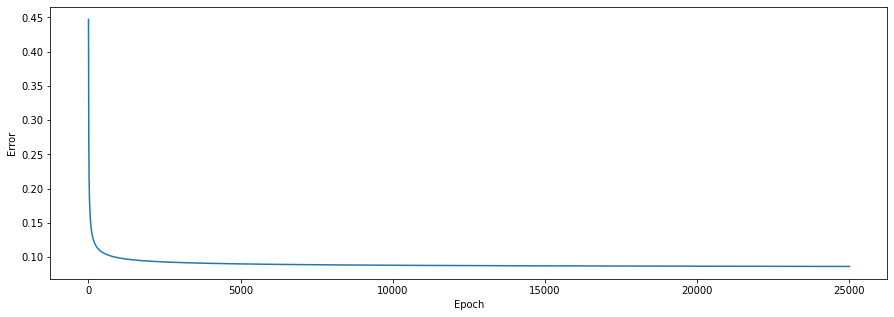

In [183]:
# https://towardsdatascience.com/inroduction-to-neural-networks-in-python-7e0b422e6c24
# https://towardsdatascience.com/how-to-build-a-simple-neural-network-from-scratch-with-python-9f011896d2f3
# https://lucidar.me/en/neural-networks/simplest-perceptron/

# https://medium.com/@enduranceprog/machine-vision-digits-94eb258c6ff8

import numpy as np # helps with the math
import matplotlib.pyplot as plt # to plot error during training

# input data
inputs = np.array([[0, 1, 0],
                   [0, 1, 1],
                   [0, 0, 0],
                   [1, 0, 0],
                   [1, 1, 1],
                   [1, 0, 1]])
# output data
outputs = np.array([[0], [0], [0], [1], [1], [1]])

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for 25,000 iterations
    def train(self, epochs=25000):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

# create neural network   
NN = NeuralNetwork(inputs, outputs)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()